In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AshaoluV/Amazon-Sales-Project/refs/heads/main/Amazon%20Sales.csv')
df.head()



,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,22/04/30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Not Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False
1,1,171-9198151-1101146,22/04/30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,22/04/30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,22/04/30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Not Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False
4,4,407-1069790-7240320,22/04/30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,No Promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,22/05/31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,No Promotion,False
128971,128971,402-9551604-7544318,22/05/31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,128972,407-9547469-3152358,22/05/31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,No Promotion,False
128973,128973,402-6184140-0545956,22/05/31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,Shipped,1,INR,1199.00,HALOL,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [5]:
df.shape

(128975, 22)

In [4]:
df.isnull().sum()

index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code       0
ship-country          33
promotion-ids          0
B2B                    0
dtype: int64

In [6]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B'],
      dtype='object')

In [9]:
df.drop(['index','promotion-ids'], axis=1, inplace=True)

In [11]:
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code        int64
ship-country           object
B2B                      bool
dtype: object

In [12]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Date'].head()

0   2030-04-22
1   2030-04-22
2   2030-04-22
3   2030-04-22
4   2030-04-22
Name: Date, dtype: datetime64[ns]

In [34]:
df['Status'].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

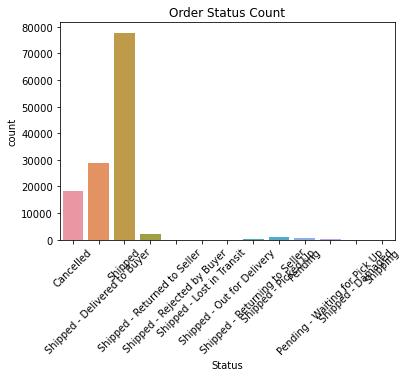

In [30]:
sns.countplot(data=df, x='Status')
plt.title("Order Status Count")
plt.xticks(rotation=45)

plt.show()

In [32]:
df['Amount'].describe()

count    128975.000000
mean        609.363662
std         313.347147
min           0.000000
25%         413.000000
50%         583.000000
75%         771.000000
max        5584.000000
Name: Amount, dtype: float64

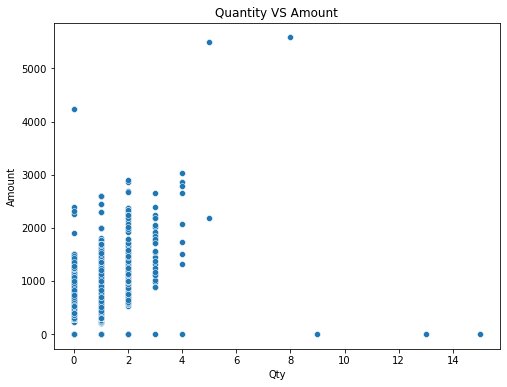

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Qty', y='Amount')
plt.title("Quantity VS Amount")
plt.show()

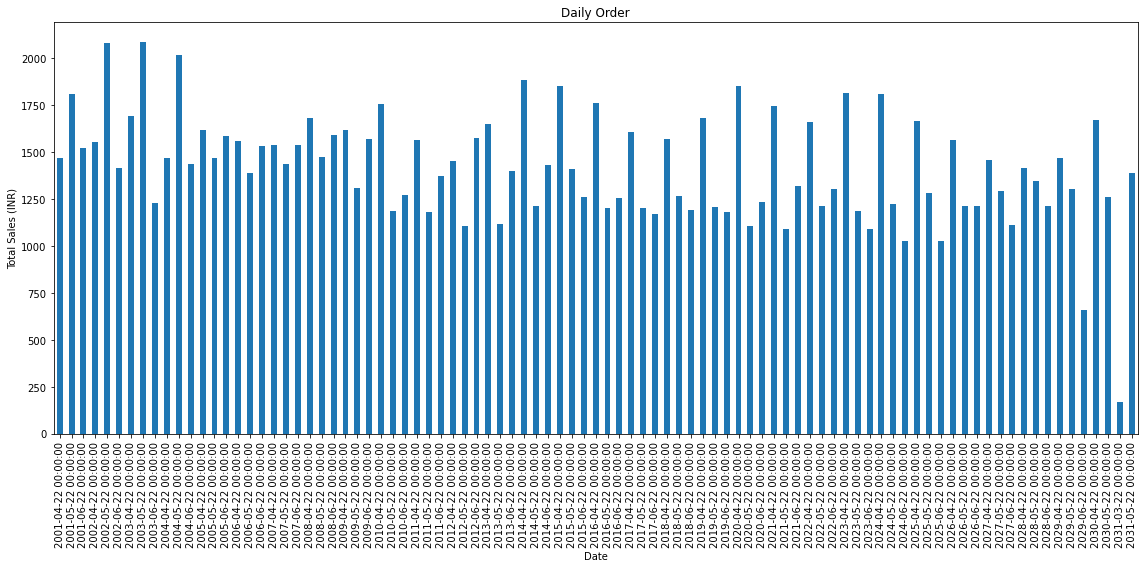

In [39]:
daily_orders=df.groupby('Date').size()
daily_orders.plot(kind='bar',figsize=(16,8),title='Daily Order')
plt.ylabel('Total Sales (INR)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

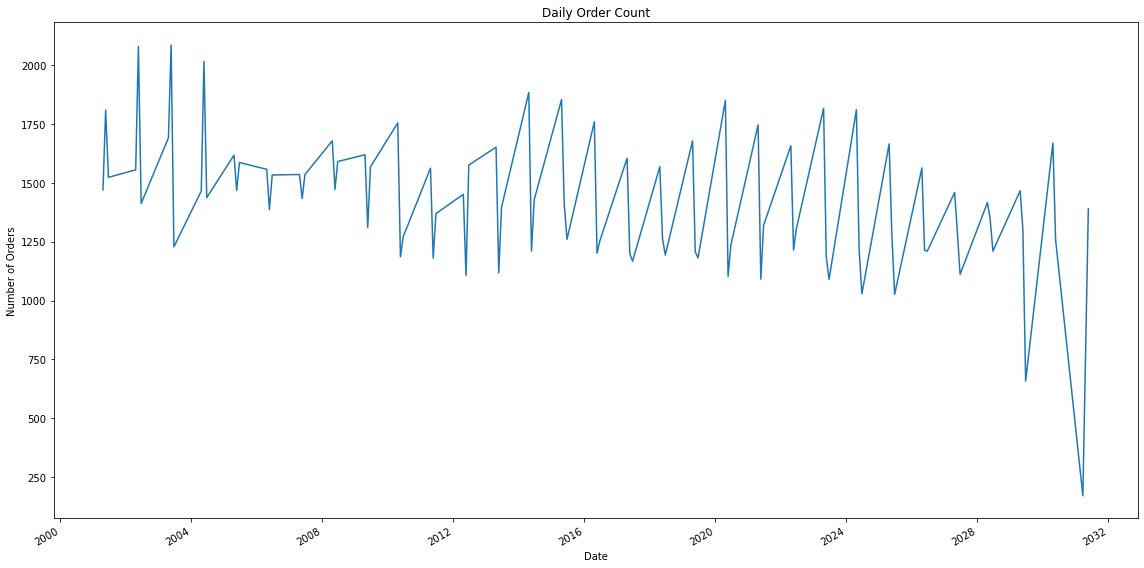

In [38]:
daily_orders = df.groupby('Date').size()
daily_orders.plot(kind='line', figsize=(16, 8), title='Daily Order Count')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


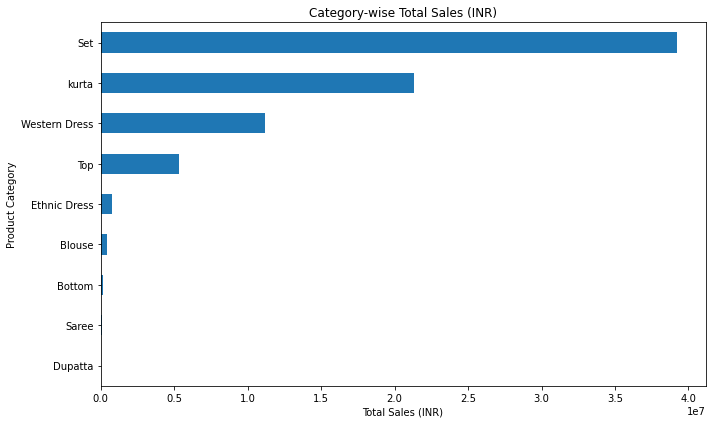

In [45]:
import matplotlib.pyplot as plt

# Group by Category and sum of Amount
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=True)

# Plot
category_sales.plot(kind='barh', figsize=(10, 6), title='Category-wise Total Sales (INR)')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


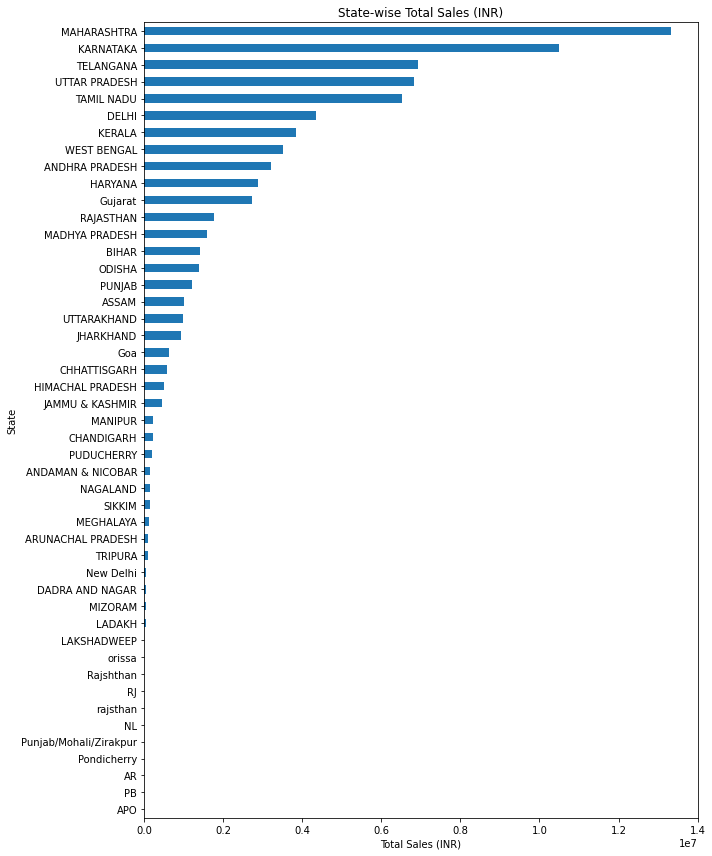

In [48]:
# Group by 'ship-state' and sum the 'Amount'
ship_wise = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=True)

# Plot
ship_wise.plot(kind='barh', figsize=(10, 12), title='State-wise Total Sales (INR)')
plt.xlabel('Total Sales (INR)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


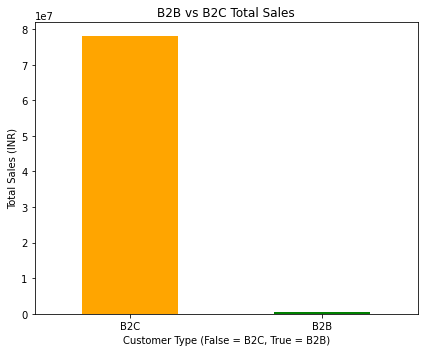

In [49]:
import matplotlib.pyplot as plt

# Group by B2B flag and calculate total sales
b2b_sales = df.groupby('B2B')['Amount'].sum()

# Plot
b2b_sales.plot(kind='bar', color=['orange', 'green'], figsize=(6, 5), title='B2B vs B2C Total Sales')
plt.xlabel('Customer Type (False = B2C, True = B2B)')
plt.ylabel('Total Sales (INR)')
plt.xticks(ticks=[0, 1], labels=['B2C', 'B2B'], rotation=0)
plt.tight_layout()
plt.show()


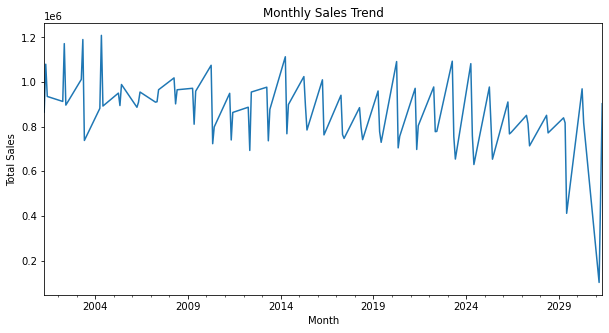

In [50]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


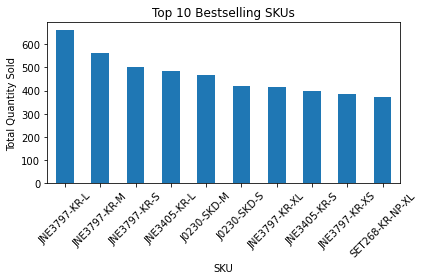

In [51]:
top_products = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Bestselling SKUs')
plt.ylabel('Total Quantity Sold')
plt.xlabel('SKU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
aov = total_sales / total_orders
print("Average Order Value (₹):", round(aov, 2))


Average Order Value (₹): 652.88


In [53]:
cancel_rate = df[df['Status'].str.contains('Cancelled', case=False)].shape[0] / df.shape[0]
print("Cancellation Rate: {:.2%}".format(cancel_rate))


Cancellation Rate: 14.21%


In [54]:
print(df['Courier Status'].value_counts())


Shipped        109487
Not Shipped      6872
Unshipped        6681
Cancelled        5935
Name: Courier Status, dtype: int64


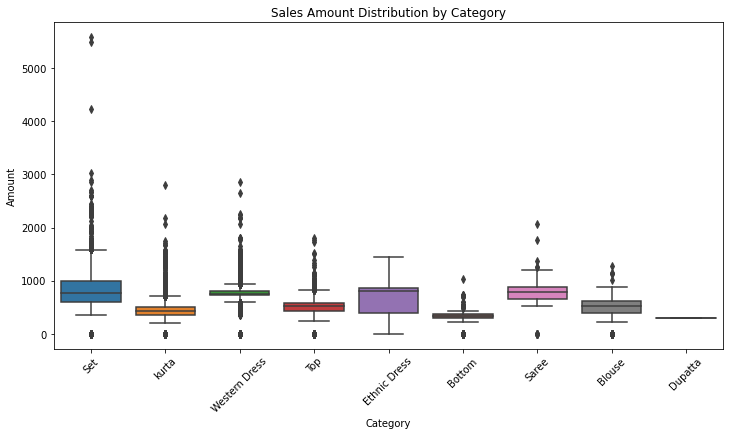

In [55]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Amount')
plt.xticks(rotation=45)
plt.title('Sales Amount Distribution by Category')
plt.show()
